In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("/kaggle/input/onlineretail/OnlineRetail.csv", encoding = "unicode-escape")
df["Total Amount"] = df["Quantity"] * df["UnitPrice"] # Total Amount is the total amount of each product (quantity) * unit price
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format = "%m/%d/%Y %H:%M")
df["Month"] = df["InvoiceDate"].dt.month
df["weekday"] = df["InvoiceDate"].dt.weekday
df["hour"] = df["InvoiceDate"].dt.hour
df.loc[df["InvoiceDate"].dt.year == 2011, "Month"] += 12
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Month,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,24,4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,24,4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,24,4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,24,4,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   Total Amount  541909 non-null  float64       
 9   Month         541909 non-null  int64         
 10  weekday       541909 non-null  int64         
 11  hour          541909 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 49.6+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total Amount,Month,weekday,hour
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,18.612431,2.431277,13.078729
std,218.081158,96.759853,1713.600303,378.810824,3.788220,1.844709,2.443270
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,12.000000,0.000000,6.000000
25%,1.000000,1.250000,13953.000000,3.400000,15.000000,1.000000,11.000000
50%,3.000000,2.080000,15152.000000,9.750000,19.000000,2.000000,13.000000
75%,10.000000,4.130000,16791.000000,17.400000,22.000000,4.000000,15.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,24.000000,6.000000,20.000000


## Frequancy Distribution and fitting of normal distribution

{'whiskers': [<matplotlib.lines.Line2D at 0x73d787535610>,
 'caps': [<matplotlib.lines.Line2D at 0x73d787535910>,
 'boxes': [<matplotlib.lines.Line2D at 0x73d787f6c550>],
 'medians': [<matplotlib.lines.Line2D at 0x73d78749eb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x73d78749ee90>],
 'means': []}

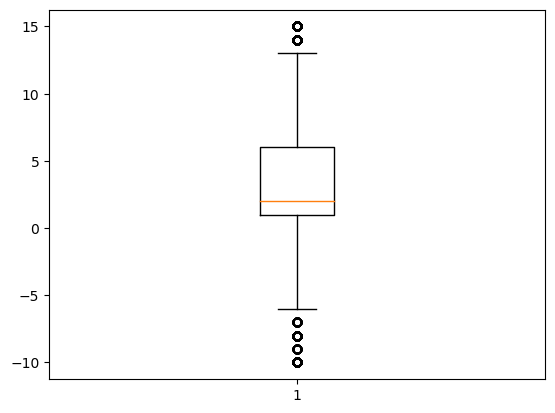

In [5]:
plt.boxplot(df["Quantity"][(df["Quantity"]>=-10)&(df["Quantity"]<=15)])

In [6]:
data = df["Quantity"][(df["Quantity"]>=-9000)&(df["Quantity"]<=7000)]

classes = [i for i in range(-10,15,2)]
hist, bins = np.histogram(data, bins=classes)

freq_table = pd.DataFrame({'Class': [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)],
                           'Frequency': hist})

freq_table

,Class,Frequency
0,-10--9,284
1,-8--7,276
2,-6--5,753
3,-4--3,1122
4,-2--1,5579
5,0-1,148227
6,2-3,118950
7,4-5,50241
8,6-7,43782
9,8-9,15166


In [7]:
stats.mode(freq_table)

ModeResult(mode=array([['-10--9', 276]], dtype=object), count=array([[1, 1]]))

(array([0.00030223, 0.00029372, 0.00080133, 0.00119402, 0.00593711,
        0.15774166, 0.12658538, 0.05346596, 0.04659236, 0.0161395 ,
        0.02473603, 0.0662107 ]),
 array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,  14]),
 <BarContainer object of 12 artists>)

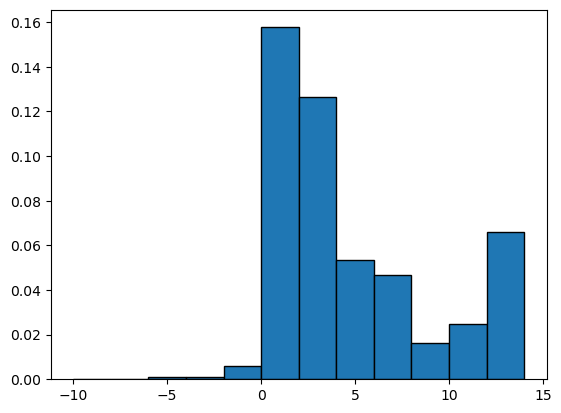

In [8]:
plt.hist(data, bins=classes, density=True, edgecolor="black")

In [9]:
mu, std = stats.norm.fit(data)

# Analysis of Description col

In [10]:
desc = pd.DataFrame(df["Description"].value_counts(dropna=True,ascending=False))
desc = desc.rename(columns={"Description":"count"})
desc = desc.reset_index()
desc = desc.rename(columns={"index":"Description"})

df_desc = df.groupby("Description")[["Quantity","UnitPrice"]].sum()
df_desc["total_amount"] = df_desc["Quantity"]*df_desc["UnitPrice"]
df_desc = df_desc.sort_values("Quantity")
df_desc = df_desc.merge(desc, on="Description")
df_desc

,Description,Quantity,UnitPrice,total_amount,count
0,printing smudges/thrown away,-19200,0.00,-0.000000e+00,2
1,"Unsaleable, destroyed.",-15644,0.00,-0.000000e+00,9
2,check,-12030,0.00,-0.000000e+00,159
3,Printing smudges/thrown away,-9058,0.00,-0.000000e+00,1
4,Damaged,-7540,0.00,-0.000000e+00,14
...,...,...,...,...,...
4218,PACK OF 72 RETROSPOT CAKE CASES,36039,1047.04,3.773427e+07,1385
4219,POPCORN HOLDER,36334,874.50,3.177408e+07,865
4220,ASSORTED COLOUR BIRD ORNAMENT,36381,2584.77,9.403652e+07,1501
4221,JUMBO BAG RED RETROSPOT,47363,5333.30,2.526011e+08,2159


In [11]:
df_desc['total_amount'] = df_desc['total_amount'].astype('int64')
df_desc = df_desc.loc[df_desc["Quantity"]>0]
df_desc.sort_values(["Quantity"],ascending=False)

,Description,Quantity,UnitPrice,total_amount,count
4222,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,173.39,9336531,542
4221,JUMBO BAG RED RETROSPOT,47363,5333.30,252601087,2159
4220,ASSORTED COLOUR BIRD ORNAMENT,36381,2584.77,94036517,1501
4219,POPCORN HOLDER,36334,874.50,31774083,865
4218,PACK OF 72 RETROSPOT CAKE CASES,36039,1047.04,37734274,1385
...,...,...,...,...,...
215,TEA TIME BREAKFAST BASKET,1,2.10,2,1
216,COUNTRY COTTAGE DOORSTOP GREEN,1,8.47,8,1
217,PURPLE CHUNKY GLASS+BEAD NECKLACE,1,11.95,11,1
218,ORANGE FELT VASE + FLOWERS,1,1.25,1,1


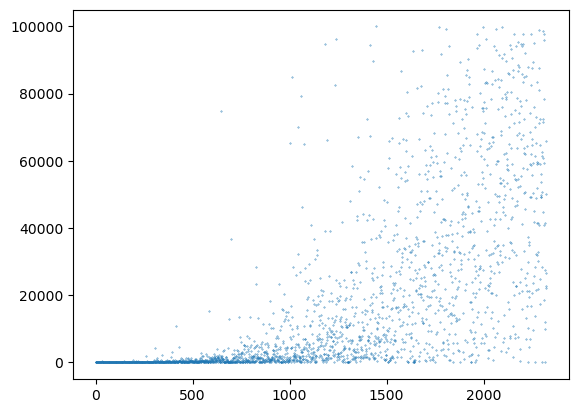

In [12]:
plt.scatter(range(len(df_desc["total_amount"][(df_desc["total_amount"]>=0) & (df_desc["total_amount"]<=100000)])),df_desc["total_amount"][(df_desc["total_amount"]>=0) & (df_desc["total_amount"]<=100000)],s=0.1)

<AxesSubplot:xlabel='Quantity', ylabel='count'>

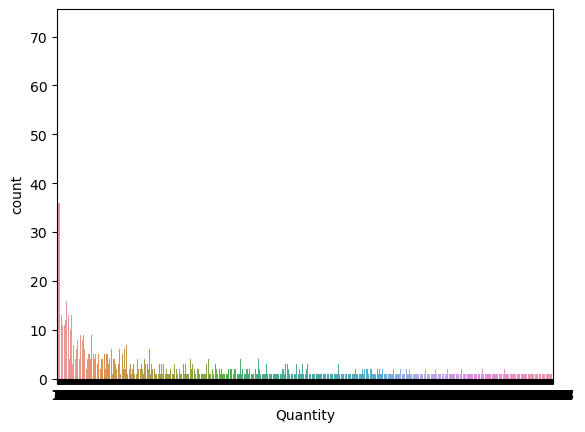

In [13]:
sns.countplot(x = df_desc["Quantity"], data = df_desc)

# Plots of each numeric col

Text(0.5, 1.0, 'Total Amount')

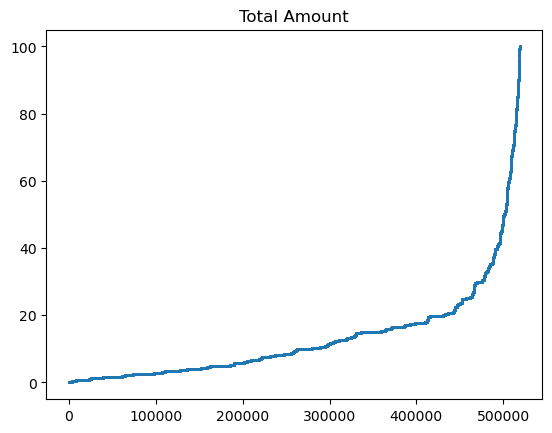

In [14]:
plt.scatter(range(len(df["Total Amount"][(df["Total Amount"]>=0) & (df["Total Amount"]<=100)])),sorted(df["Total Amount"][(df["Total Amount"]>=0) & (df["Total Amount"]<=100)]),s=0.2)
plt.title("Total Amount")

Text(0.5, 1.0, 'UnitPrice')

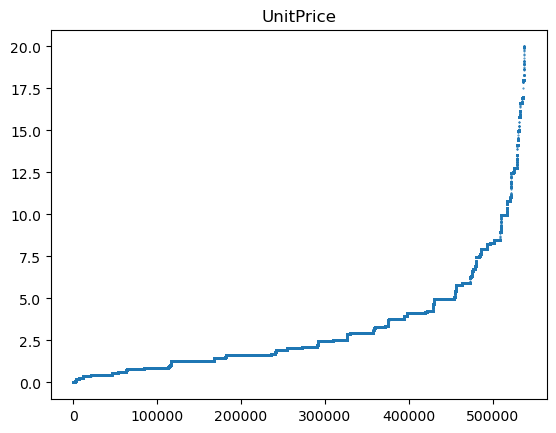

In [15]:
plt.scatter(range(len(df["UnitPrice"][(df["UnitPrice"]>=0) & (df["UnitPrice"]<=20)])),sorted(df["UnitPrice"][(df["UnitPrice"]>=0) & (df["UnitPrice"]<=20)]),s=0.2)
plt.title("UnitPrice")

# Analysis of Quantity Col

In [16]:
df.sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Month,weekday,hour
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6,24,4,9
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,13,1,10
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,-0.0,18,1,10
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,-0.0,18,1,10
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8,12,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.0,22,3,12
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom,0.0,13,4,12
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0,23,4,15
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,13,1,10


Following are the extreme values...

## "Paper Craft, Little Birdie" amounting 80,995 was purchased and returned
## "Medium Ceramic Top storage bar" amounting 74,215 was also returned

In [17]:
df[df["Quantity"]<0].sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Month,weekday,hour
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60,24,4,9
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60,13,1,10
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,-0.00,18,1,10
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,-0.00,18,1,10
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.80,12,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...
240697,C558112,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,2011-06-26 16:08:00,9.95,17114.0,United Kingdom,-9.95,18,6,16
240696,C558112,23091,ZINC HERB GARDEN CONTAINER,-1,2011-06-26 16:08:00,6.25,17114.0,United Kingdom,-6.25,18,6,16
240694,C558112,82486,WOOD S/3 CABINET ANT WHITE FINISH,-1,2011-06-26 16:08:00,8.95,17114.0,United Kingdom,-8.95,18,6,16
242447,C558347,S,SAMPLES,-1,2011-06-28 14:47:00,9.90,NaN,United Kingdom,-9.90,18,1,14


# Grouping Invoices and further analysis

In [18]:
df_invoice = df.groupby("InvoiceNo")[["Quantity","UnitPrice","Total Amount"]].sum()
df_invoice = df_invoice.sort_values("Quantity", ascending=False)
df_invoice

,Quantity,UnitPrice,Total Amount
InvoiceNo,,,
581483,80995,2.08,168469.60
541431,74215,1.04,77183.60
556917,15049,283.57,22775.93
563076,14730,269.39,19150.66
574941,14149,498.89,52940.94
...,...,...,...
C536757,-9360,0.03,-280.80
556691,-9600,0.00,0.00
556690,-9600,0.00,0.00


# Analysis of the df_invoice Frame

* There are 25900 different invoices
* On average the total amount of the bill is $483.49
* 

In [19]:
df_invoice1 = df_invoice[(df_invoice["Quantity"]<=2500) & (df_invoice["Quantity"]>=0) & (df_invoice["Total Amount"]<=2500) & (df_invoice["Total Amount"]>=0)]

In [20]:
df_invoice1.head()

,Quantity,UnitPrice,Total Amount
InvoiceNo,,,
550906,2460,51.78,1368.16
543669,2400,0.94,2256.00
544152,2400,0.06,144.00
566207,2352,8.02,1210.32
560828,2316,42.88,1088.86


In [21]:
df_invoice1.shape

(20186, 3)

In [22]:
df_invoice1.describe()

,Quantity,UnitPrice,Total Amount
count,20186.000000,20186.000000,20186.000000
mean,208.336570,78.509927,372.024067
std,233.037296,147.331967,379.610561
min,1.000000,0.000000,0.000000
25%,61.000000,15.400000,135.000000
50%,141.500000,42.160000,289.245000
75%,272.000000,85.000000,456.885000
max,2460.000000,2500.000000,2500.000000


In [23]:
df_invoice2 = df_invoice1.sample(n=1000).sort_values("Total Amount")
df_invoice2.shape

(1000, 3)

<AxesSubplot:ylabel='InvoiceNo'>

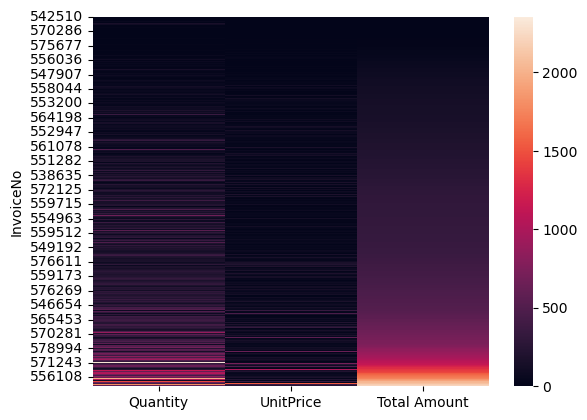

In [24]:
sns.heatmap(data=df_invoice2, cbar=True)

In [25]:
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Month,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,12,2,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12,2,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,2,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12,2,8


<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

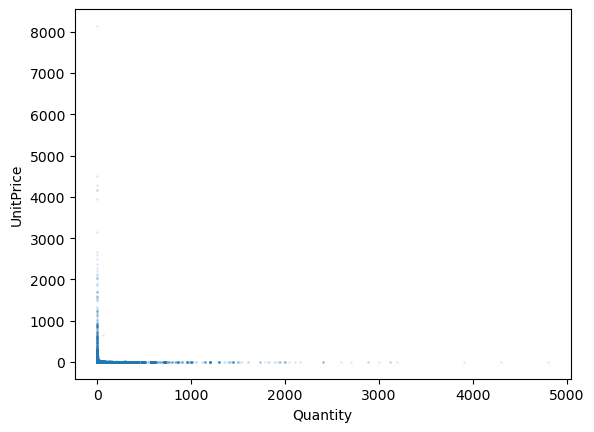

In [26]:
df.query("UnitPrice > 0 & UnitPrice < 10000 & Quantity > 0 & Quantity < 10000").plot(x="Quantity",y="UnitPrice", kind="scatter",alpha=0.1,s=1)

In [27]:
invoice = pd.DataFrame(df["InvoiceNo"].value_counts())
invoice

,InvoiceNo
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
554023,1
554022,1
554021,1
554020,1


<AxesSubplot:>

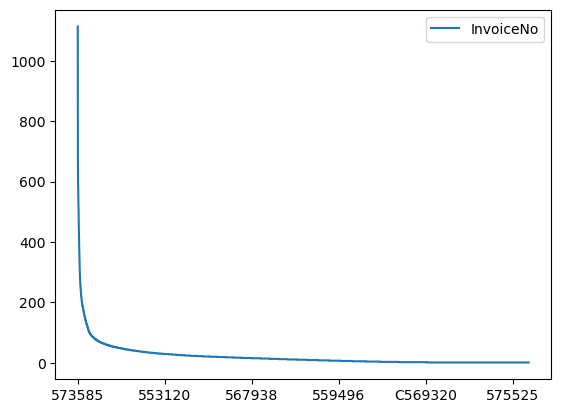

In [28]:
invoice.plot()

In [29]:
invoice.describe()

,InvoiceNo
count,25900.000000
mean,20.923127
std,43.031334
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1114.000000


<AxesSubplot:>

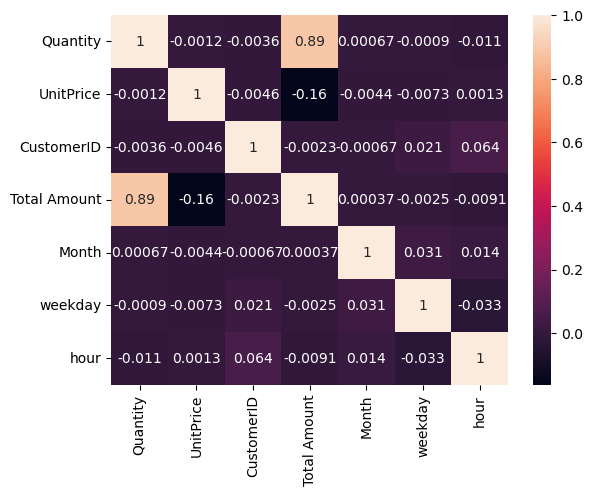

In [30]:
corr = df.corr()
sns.heatmap(data=corr,annot=True)

<AxesSubplot:xlabel='InvoiceNo', ylabel='Count'>

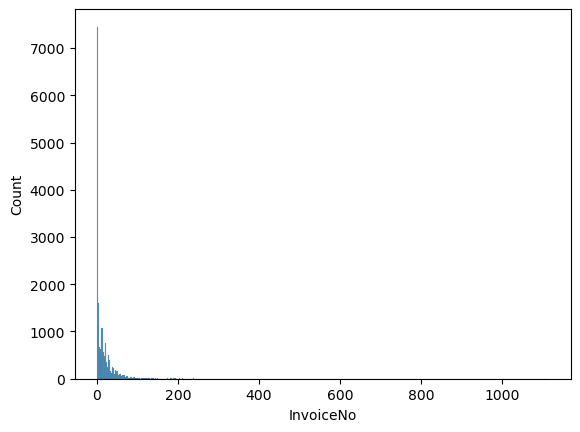

In [31]:
sns.histplot(data=invoice.InvoiceNo)

# Making distribution of Quantity against different time frames

### Monthly data

In [32]:
month = df.groupby("Month")["Quantity"].sum()
month = pd.DataFrame(month)
month.reset_index()

,Month,Quantity
0,12,342228
1,13,308966
2,14,277989
3,15,351872
4,16,289098
5,17,380391
6,18,341623
7,19,391116
8,20,406199
9,21,549817


In [33]:
q1 = list(month["Quantity"])

mean=np.mean(q1)
std=np.std(q1)

scaledQ = []
for i in q1:
    scaledQ.append((i-mean)/std)

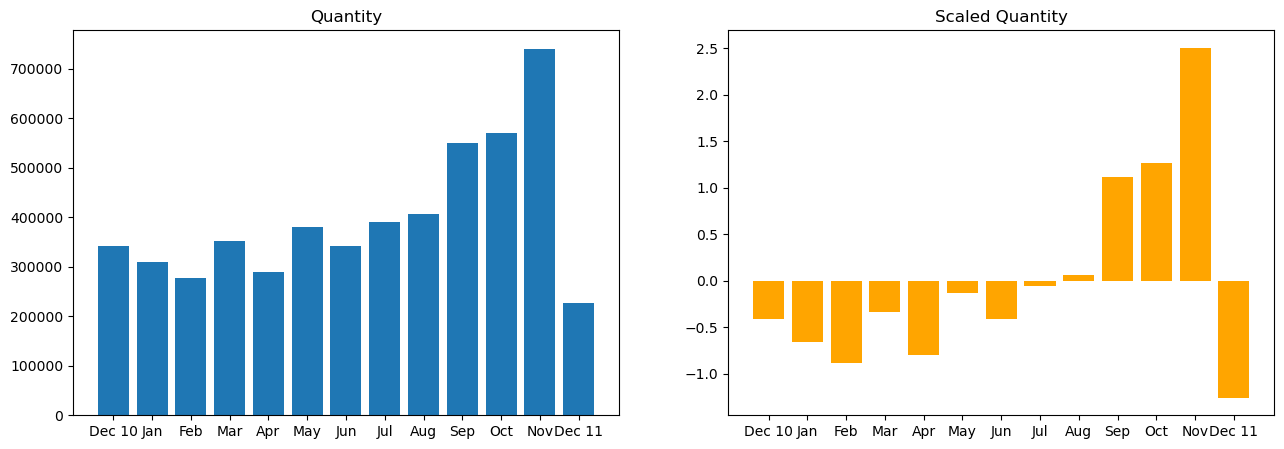

In [34]:
plt.figure(figsize=(15.5,5))
mon=["Dec 10","Jan", "Feb","Mar","Apr", "May","Jun", "Jul","Aug","Sep", "Oct", "Nov","Dec 11"]

plt.subplot(1,2,1)
plt.bar(x=mon, height=q1)
plt.title("Quantity")

plt.subplot(1,2,2)
plt.bar(x=mon, height=scaledQ, color="orange")
plt.title("Scaled Quantity")
plt.show()

## Hourly Data

In [35]:
hour=pd.DataFrame(df.groupby("hour")[["Quantity","UnitPrice","Total Amount"]].sum())
hour = hour.reset_index()
hour

,hour,Quantity,UnitPrice,Total Amount
0,6,-86,440.660,-497.350
1,7,15361,1546.310,31009.320
2,8,158163,29930.330,281840.860
3,9,429366,188947.671,766734.051
4,10,684416,212692.181,1329056.521
5,11,637672,268246.250,1147437.920
6,12,823935,313903.320,1362484.290
7,13,676803,295842.720,1177506.370
8,14,571549,279164.021,1095212.901
9,15,609710,487047.170,1189458.280


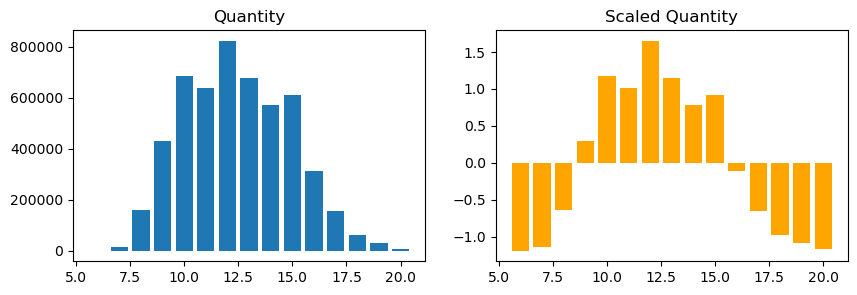

In [36]:
q = list(hour["Quantity"])
mean=np.mean(q)
std=np.std(q)
scaledq = [(i-mean)/std for i in q]


plt.figure(figsize=(10,3))
hr = list(hour["hour"])

plt.subplot(1,2,1)
plt.bar(x=hr, height=q)
plt.title("Quantity")

plt.subplot(1,2,2)
plt.bar(x=hr, height=scaledq, color="orange")
plt.title("Scaled Quantity")
plt.show()

## Weekly/Daily Data

In [37]:
weekday=pd.DataFrame(df.groupby("weekday")[["Quantity","UnitPrice","Total Amount"]].sum())
weekday = weekday.reset_index()
weekday

,weekday,Quantity,UnitPrice,Total Amount
0,0,815354,535548.461,1588609.431
1,1,961543,521248.161,1966182.791
2,2,969558,433281.460,1734147.010
3,3,1167823,426285.740,2112519.000
4,4,794440,396536.451,1540610.811
5,6,467732,185903.701,805678.891


In [38]:
weekday["weekday"]=weekday["weekday"].replace([0,1,2,3,4,5,6],["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"])
weekday.loc[5]=["Sat",0,0,0]
weekday.loc[6]=["Sun",467732,185903.701,805678.891]
weekday

,weekday,Quantity,UnitPrice,Total Amount
0,Mon,815354,535548.461,1588609.431
1,Tues,961543,521248.161,1966182.791
2,Wed,969558,433281.460,1734147.010
3,Thurs,1167823,426285.740,2112519.000
4,Fri,794440,396536.451,1540610.811
5,Sat,0,0.000,0.000
6,Sun,467732,185903.701,805678.891


In [39]:
q = list(weekday["Quantity"])

mean=np.mean(q)
std=np.std(q)

scaledq = [(i-mean)/std for i in q]

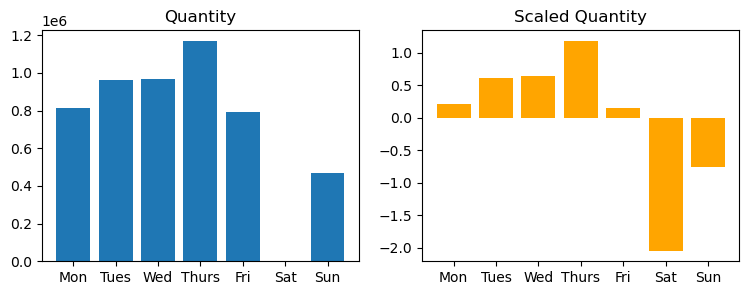

In [40]:
plt.figure(figsize=(9,3))
week=list(weekday["weekday"])

plt.subplot(1,2,1)
plt.bar(x=week, height=q)
plt.title("Quantity")

plt.subplot(1,2,2)
plt.bar(x=week, height=scaledq, color="orange")
plt.title("Scaled Quantity")
plt.show()

# Analysis of top 5 sold items

In [41]:
df["count"]=1

df1 = df.groupby("Description")[["Quantity","count"]].sum().sort_values("Quantity",ascending=False).reset_index().head(3)
df1 = df1.merge(df, on="Description", how="inner")
df1

,Description,Quantity_x,count_x,InvoiceNo,StockCode,Quantity_y,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Month,weekday,hour,count_y
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,542,536615,84077,48,2010-12-02 10:09:00,0.29,14047.0,United Kingdom,13.92,12,3,10,1
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,542,536618,84077,48,2010-12-02 10:17:00,0.29,17017.0,United Kingdom,13.92,12,3,10,1
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,542,536830,84077,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,518.40,12,3,17,1
3,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,542,536839,84077,288,2010-12-02 18:25:00,0.21,15093.0,United Kingdom,60.48,12,3,18,1
4,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,542,536856,84077,48,2010-12-03 10:26:00,0.29,13370.0,United Kingdom,13.92,12,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,ASSORTED COLOUR BIRD ORNAMENT,36381,1501,581170,84879,32,2011-12-07 15:00:00,1.69,13767.0,United Kingdom,54.08,24,2,15,1
4198,ASSORTED COLOUR BIRD ORNAMENT,36381,1501,581217,84879,8,2011-12-08 09:20:00,3.12,NaN,United Kingdom,24.96,24,3,9,1
4199,ASSORTED COLOUR BIRD ORNAMENT,36381,1501,581405,84879,3,2011-12-08 13:50:00,1.69,13521.0,United Kingdom,5.07,24,3,13,1
4200,ASSORTED COLOUR BIRD ORNAMENT,36381,1501,581492,84879,16,2011-12-09 10:03:00,3.12,NaN,United Kingdom,49.92,24,4,10,1


In [42]:
sums = df1.groupby("Description")[["Quantity_y","count_y"]].sum().sort_values("Quantity_y",ascending=False)#.reset_index()
sums

,Quantity_y,count_y
Description,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,542
JUMBO BAG RED RETROSPOT,47363,2159
ASSORTED COLOUR BIRD ORNAMENT,36381,1501


<AxesSubplot:ylabel='Description'>

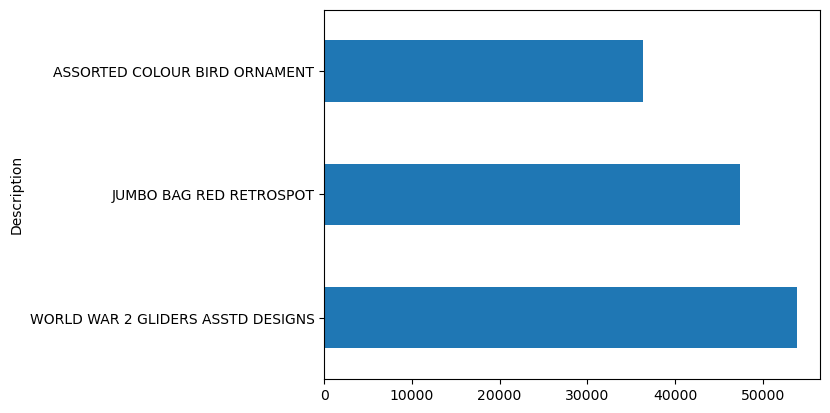

In [43]:
sums["Quantity_y"].plot(kind="barh")

In [44]:
month1 = pd.DataFrame(df1.loc[df1["Description"] == "WORLD WAR 2 GLIDERS ASSTD DESIGNS"].groupby("Month")["Quantity_y"].sum()).reset_index()
month2 = pd.DataFrame(df1.loc[df1["Description"] == "JUMBO BAG RED RETROSPOT"].groupby("Month")["Quantity_y"].sum()).reset_index()
month3 = pd.DataFrame(df1.loc[df1["Description"] == "ASSORTED COLOUR BIRD ORNAMENT"].groupby("Month")["Quantity_y"].sum()).reset_index()

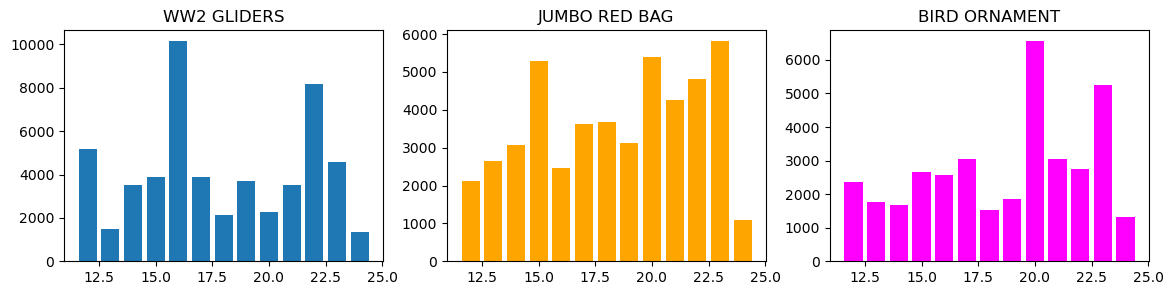

In [45]:
plt.figure(figsize=(14,3))
mon = list(month1["Month"])

plt.subplot(1,3,1)
plt.bar(x=mon, height=list(month1["Quantity_y"]))
plt.title("WW2 GLIDERS")

plt.subplot(1,3,2)
plt.bar(x=mon, height=list(month2["Quantity_y"]), color="orange")
plt.title("JUMBO RED BAG")

plt.subplot(1,3,3)
plt.bar(x=mon, height=list(month3["Quantity_y"]), color="magenta")
plt.title("BIRD ORNAMENT")

plt.show()

In [46]:
day1 = pd.DataFrame(df1.loc[df1["Description"] == "WORLD WAR 2 GLIDERS ASSTD DESIGNS"].groupby("weekday")["Quantity_y"].sum()).reset_index()
day2 = pd.DataFrame(df1.loc[df1["Description"] == "JUMBO BAG RED RETROSPOT"].groupby("weekday")["Quantity_y"].sum()).reset_index()
day3 = pd.DataFrame(df1.loc[df1["Description"] == "ASSORTED COLOUR BIRD ORNAMENT"].groupby("weekday")["Quantity_y"].sum()).reset_index()

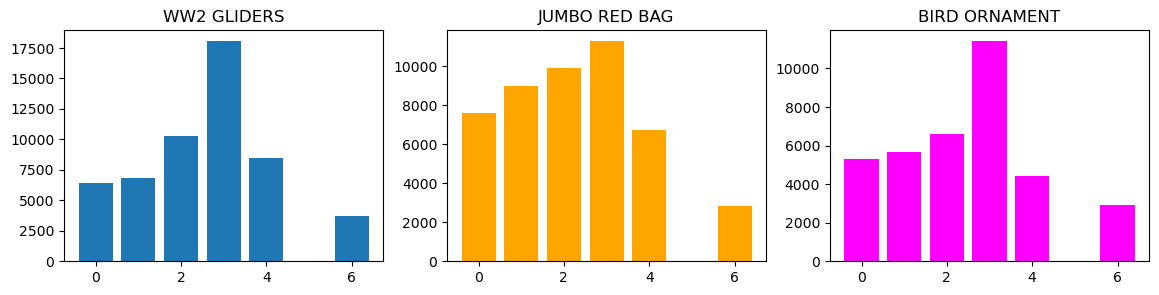

In [47]:
plt.figure(figsize=(14,3))
mon = list(day1["weekday"])

plt.subplot(1,3,1)
plt.bar(x=mon, height=list(day1["Quantity_y"]))
plt.title("WW2 GLIDERS")

plt.subplot(1,3,2)
plt.bar(x=mon, height=list(day2["Quantity_y"]), color="orange")
plt.title("JUMBO RED BAG")

plt.subplot(1,3,3)
plt.bar(x=mon, height=list(day3["Quantity_y"]), color="magenta")
plt.title("BIRD ORNAMENT")

plt.show()

In [48]:
hour1 = pd.DataFrame(df1.loc[df1["Description"] == "WORLD WAR 2 GLIDERS ASSTD DESIGNS"].groupby("hour")["Quantity_y"].sum()).reset_index()
hour2 = pd.DataFrame(df1.loc[df1["Description"] == "JUMBO BAG RED RETROSPOT"].groupby("hour")["Quantity_y"].sum()).reset_index()
hour3 = pd.DataFrame(df1.loc[df1["Description"] == "ASSORTED COLOUR BIRD ORNAMENT"].groupby("hour")["Quantity_y"].sum()).reset_index()

In [49]:
hour1.loc[13] = [20,0]
hour1

,hour,Quantity_y
0,7,144
1,8,864
2,9,3413
3,10,8647
4,11,5526
5,12,12213
6,13,7056
7,14,4712
8,15,5812
9,16,1554


In [50]:
hour2

,hour,Quantity_y
0,7,110
1,8,1880
2,9,4382
3,10,7080
4,11,7539
5,12,7567
6,13,5618
7,14,4750
8,15,3993
9,16,3504


In [51]:
first=pd.DataFrame({"hour":7,"Quantity_y":0}, index=[0])

hour3 = pd.concat([first,hour3],ignore_index=True)
hour3

,hour,Quantity_y
0,7,0
1,8,752
2,9,2590
3,10,5140
4,11,3021
5,12,4544
6,13,4888
7,14,2805
8,15,5806
9,16,1940


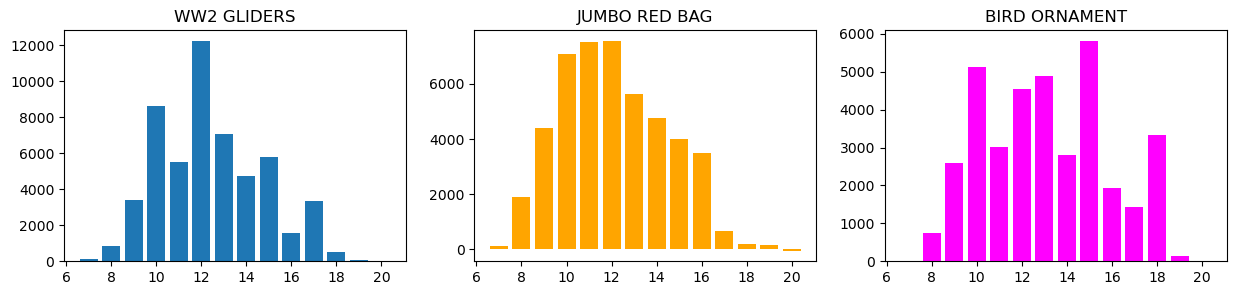

In [52]:
plt.figure(figsize=(15,3))
mon = list(hour1["hour"])

plt.subplot(1,3,1)
plt.bar(x=mon, height=list(hour1["Quantity_y"]))
plt.title("WW2 GLIDERS")

plt.subplot(1,3,2)
plt.bar(x=mon, height=list(hour2["Quantity_y"]), color="orange")
plt.title("JUMBO RED BAG")

plt.subplot(1,3,3)
plt.bar(x=mon, height=list(hour3["Quantity_y"]), color="magenta")
plt.title("BIRD ORNAMENT")

plt.show()